#                                  `Project - HR Analytics`

## PROBLEM STATEMENT

## Dataset Description

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
train=pd.read_csv("train_hr.csv")
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Exploratory Data Analsis (EDA)

In [3]:
# Dropping unnecessary feature(employee_id)
train.drop(columns="employee_id",inplace=True)

In [4]:
# Deal with mixed variable in region and change data type to numeric
train['region'] = train['region'].str.replace("region_",'')
train['region']=pd.to_numeric(train['region'])
train.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [5]:
#Dimensions of the data
train.shape

(54808, 13)

In [6]:
#Features of the data
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
# Checking Data Types
train.dtypes

department               object
region                    int64
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
train["previous_year_rating"].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [9]:
# Dataset Information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  int64  
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 5.4+ MB


In [10]:
# Statistical analysis
train.describe().T

,count,mean,std,min,25%,50%,75%,max
region,54808.0,14.195045,10.086273,1.0,4.0,13.0,22.0,34.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [11]:
train.rename(columns={"KPIs_met >80%" : "KPIs_80"},inplace=True)

In [12]:
#Checkng for null vales
train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_80                    0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
# Check duplicate values
train.duplicated().sum()

118

In [14]:
# find categorical variables

categorical = [var for var in train.columns if train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 4 categorical variables

The categorical variables are :

 ['department', 'education', 'gender', 'recruitment_channel']


## Data Visualization

<AxesSubplot:>

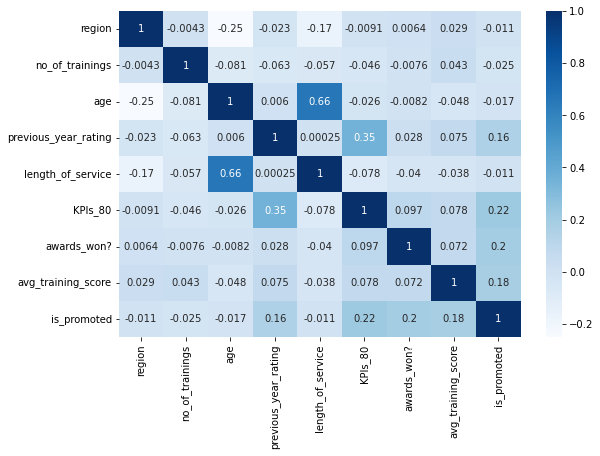

In [15]:
plt.figure(figsize=(9,6))
sns.heatmap(train.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

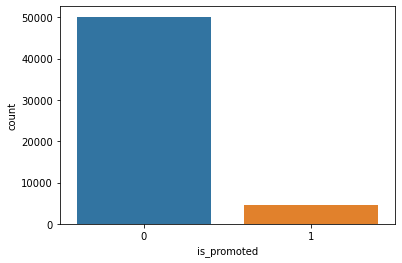

In [16]:
#  Target variable distribution
sns.countplot(x = 'is_promoted', data = train)

<AxesSubplot:xlabel='age'>

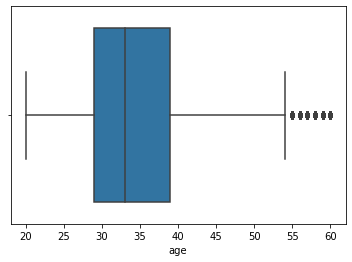

In [17]:
# Boxplot visualization
sns.boxplot(x = 'age', data= train)

<AxesSubplot:xlabel='length_of_service'>

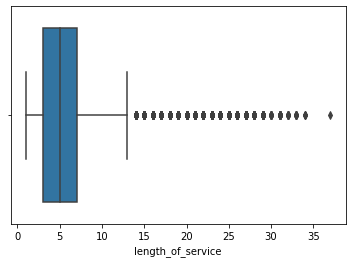

In [18]:
# Checking for outliers
sns.boxplot(x = 'length_of_service', data= train)

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


<AxesSubplot:xlabel='department', ylabel='count'>

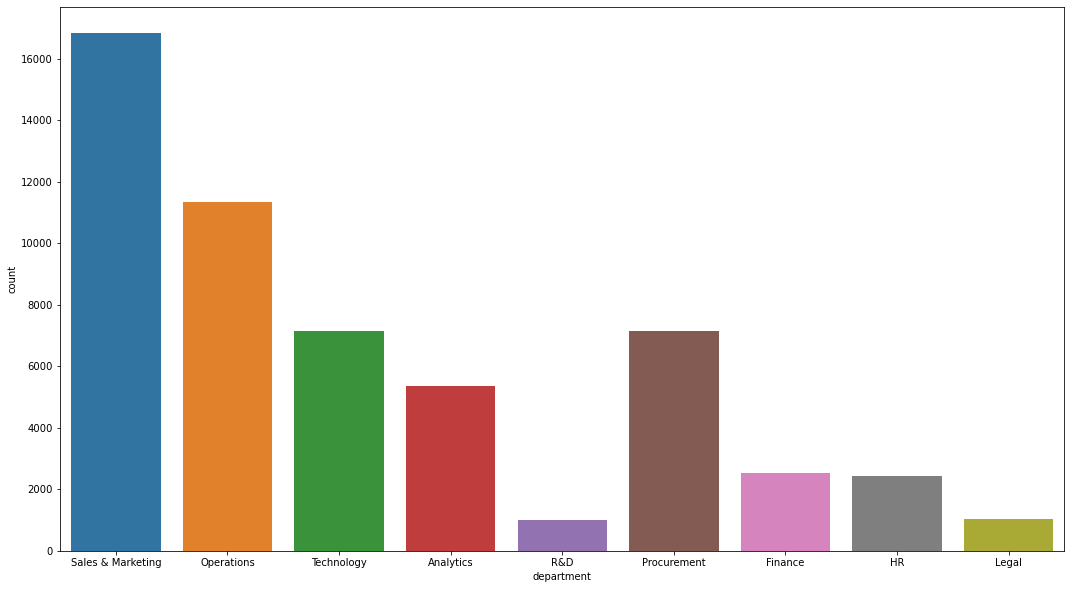

In [19]:
print(train["department"].value_counts())
plt.figure(figsize= (18, 10))
sns.countplot(x = 'department', data = train)

0.6571113793687708


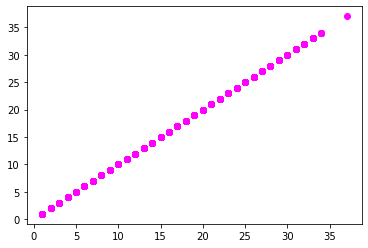

In [20]:
# Correlation between minutes & charge
print(train.age.corr(train.length_of_service))
plt.scatter(train.length_of_service,train.length_of_service,c="magenta")

<AxesSubplot:xlabel='is_promoted', ylabel='avg_training_score'>

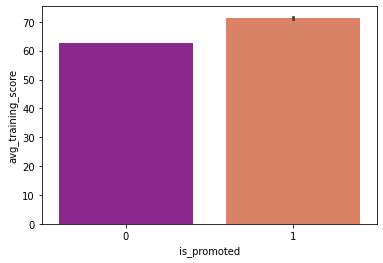

In [21]:
# Relation between 'is_promoted' & 'total_charge' columns
sns.barplot(x ='is_promoted', y ='avg_training_score', data = train, 
            palette ='plasma')

<AxesSubplot:xlabel='avg_training_score', ylabel='Count'>

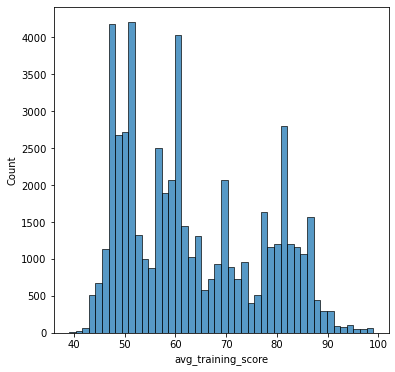

In [22]:
#Checking distribution
plt.figure(figsize= (6, 6))
sns.histplot(data=train, x="avg_training_score")

<AxesSubplot:>

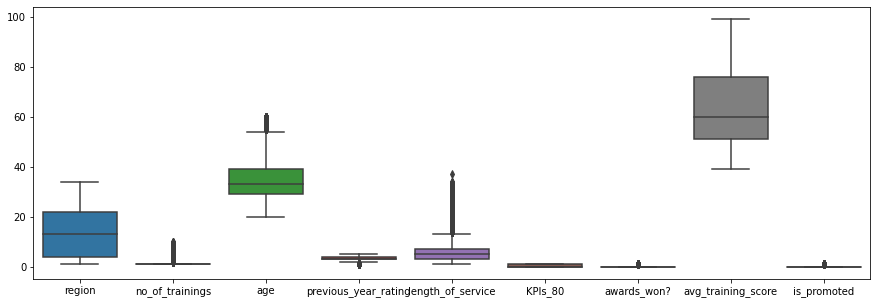

In [23]:
# Boxplot visualization
plt.figure(figsize= (15,5))
sns.boxplot(data = train)

In [24]:
# Considering features whose outliers need to be treated
req_col = ['no_of_trainings', 'age','length_of_service']

In [25]:
def impute_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    df = np.where(df > upper, upper, np.where(df < lower, lower, df))
    return df       

In [26]:
# Apply function on selected columns
train[req_col] = impute_outlier(train[req_col])

<AxesSubplot:>

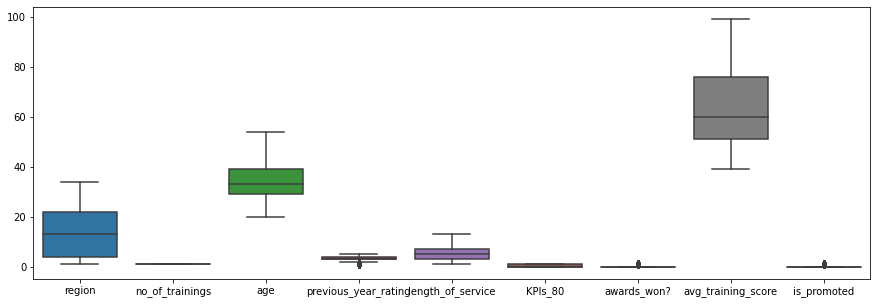

In [27]:
plt.figure(figsize= (15,5))
sns.boxplot(data = train)

## Splitting the data

In [28]:
# Split independent and target variable
x=train.drop(columns=["is_promoted"])
y=train["is_promoted"]

In [29]:
# Splitting data into train/test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

## Feature Engineering

In [30]:
# Imputation and OneHot Encoding using Column Transformer
trf = ColumnTransformer(transformers=[
    ('t1',SimpleImputer(missing_values=np.nan, strategy='mean'),['previous_year_rating']),
    ('t2',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),['education']),
    ('t3',OneHotEncoder(drop='first',sparse_output=False),["department","gender","recruitment_channel"])],remainder='passthrough')

In [31]:
trf.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('t1', SimpleImputer(),
                                 ['previous_year_rating']),
                                ('t2', SimpleImputer(strategy='most_frequent'),
                                 ['education']),
                                ('t3',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['department', 'gender',
                                  'recruitment_channel'])])

In [32]:
# Apply transformer on train and test set
x_train_transform = trf.fit_transform(x_train)
x_test_transform = trf.fit_transform(x_test)

In [33]:
x_train_transform.head(2)

,t1__previous_year_rating,t2__education,t3__department_Finance,t3__department_HR,t3__department_Legal,t3__department_Operations,t3__department_Procurement,t3__department_R&D,t3__department_Sales & Marketing,t3__department_Technology,t3__gender_m,t3__recruitment_channel_referred,t3__recruitment_channel_sourcing,remainder__region,remainder__no_of_trainings,remainder__age,remainder__length_of_service,remainder__KPIs_80,remainder__awards_won?,remainder__avg_training_score
35598,3.000000,Bachelor's,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,7,1.0,27.0,4.0,0,0,48
8367,3.329575,Bachelor's,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,22,1.0,29.0,1.0,0,0,80


In [34]:
# Column Transformer for ordinal encoding
trf1 = ColumnTransformer(transformers=[
     ('t4',OrdinalEncoder(categories=[["Below Secondary", "Bachelor's", "Master's & above"]]),['t2__education'])],remainder='passthrough')

In [35]:
trf1.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('t4',
                                 OrdinalEncoder(categories=[['Below Secondary',
                                                             "Bachelor's",
                                                             "Master's & "
                                                             'above']]),
                                 ['t2__education'])])

In [36]:
# Apply trf1 to previously transformed data
x_train_tran = trf1.fit_transform(x_train_transform)
x_test_tran = trf1.fit_transform(x_test_transform)

In [37]:
x_train_tran.shape

(43846, 20)

In [39]:
from imblearn.over_sampling import RandomOverSampler 

In [40]:
os=RandomOverSampler()

print("The number of classes before fit {}".format(Counter(y_train)))

x_train_ns,y_train_ns=os.fit_resample(x_train_tran, y_train)

print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 40113, 1: 3733})
The number of classes after fit Counter({0: 40113, 1: 40113})


In [41]:
scaler=MinMaxScaler()
scaler.fit(x_train_ns)

MinMaxScaler()

In [42]:
#getting array
x_train_scaled=scaler.transform(x_train_ns)
x_test_scaled=scaler.transform(x_test_tran)

In [43]:
#converting dataframe
x_train_scaled=pd.DataFrame(x_train_scaled,columns = x_train_ns.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns = x_test_tran.columns)

In [44]:
model = ExtraTreesClassifier()
model.fit(x_train_scaled,y_train_ns)

ExtraTreesClassifier()

In [45]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train_ns.columns)
x1=feat_importances.nlargest(10)

In [46]:
def Column_Index(data):
    data=data.iloc[:,[1,5,8,10,12,13,15,16,17,19]]
    return data

In [47]:
x_train_scaled=Column_Index(x_train_scaled)
x_test_scaled=Column_Index(x_test_scaled)

In [48]:
# x_test_scaled

In [61]:
lr = LogisticRegression(random_state=23)
lr.fit(x_train_scaled, y_train_ns)
y_pred_lr = lr.predict(x_test_scaled)
acc1_LR = accuracy_score(y_pred_lr, y_test)
print(acc1_LR * 100)

72.77869002006932


In [62]:
y_pred_tr=lr.predict(x_train_scaled)
y_pred_ts=lr.predict(x_test_scaled)

In [66]:
print("Training Accuracy :",accuracy_score(y_pred_tr, y_train_ns))
print("Testing Accuracy :",accuracy_score(y_pred_ts, y_test))

Training Accuracy : 0.7507291900381422
Testing Accuracy : 0.7277869002006933


In [50]:
KFold_Validation=KFold(10)

In [51]:
results=cross_val_score(lr,x_train_scaled,y_train_ns,scoring='accuracy',cv=KFold_Validation)
print(results)
print("Mean:",np.mean(results))

[0.69774399 0.70484856 0.70110931 0.71357348 0.70123395 0.74211642
 0.69845425 0.69621042 0.70381451 0.70568437]
Mean: 0.7064789251346159


In [59]:
xg = XGBClassifier(eta=0.3,gamma=10)
xg.fit(x_train_scaled, y_train_ns)
y_pred_xg = lr.predict(x_test_scaled)
acc1_LR = accuracy_score(y_pred_xg, y_test)
print(acc1_LR * 100)

72.77869002006932


In [60]:
results=cross_val_score(xg,x_train_scaled,y_train_ns,scoring='accuracy',cv=KFold_Validation)
print(results)
print("Mean:",np.mean(results))

[0.75694877 0.770784   0.75944161 0.77876106 0.7714072  0.8701234
 0.90638245 0.90463725 0.90563451 0.89104961]
Mean: 0.8315169849659044


In [69]:
y_pred_tr1=xg.predict(x_train_scaled)
y_pred_ts1=xg.predict(x_test_scaled)

In [70]:
print("Training Accuracy :",accuracy_score(y_pred_tr1, y_train_ns))
print("Testing Accuracy :",accuracy_score(y_pred_ts1, y_test))

Training Accuracy : 0.8699299478971905
Testing Accuracy : 0.7842546980478015


In [58]:
#Dumping the model object
import pickle
pickle.dump(xg, open('model.pkl','wb'))

#Reloading the model object
model = pickle.load(open('model.pkl','rb'))